# 导入包
链接云端硬盘

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


安装缺少的库

In [3]:
!pip install python_speech_features
!pip install hmmlearn

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5887 sha256=11dd5b457fe631fe61453ce76c76c23ea46a7d177fab21f96a60dffd279e2901
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features
     |████████████████████████████████| 368kB 3.4MB/s 


In [4]:
from python_speech_features import mfcc, logfbank
from scipy.io import wavfile
import wave
import glob
import os.path as path
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
import os
import logging

# 训练样本数据

In [5]:
# 使用机器学习对音乐进行分类

class HMMTrainer(object):
    # 使用4作为component默认值， 可以尝试不同的数， 找到最高得分
    def __init__(self, model_name='GaussianHMM', n_components=4, cov_type='diag', n_iter=1000):
        self.model_name = model_name
        self.n_components = n_components
        self.cov_type = cov_type
        self.n_iter = n_iter
        self.models = []
        if self.model_name == 'GaussianHMM':
            self.model = hmm.GaussianHMM(n_components=self.n_components, covariance_type=self.cov_type,
                                         n_iter=self.n_iter)
        else:
            raise TypeError('Invalid model type')

    def train(self, X):
        np.seterr(all='ignore')
        self.models.append(self.model.fit(X))

    # 获取为止类型音乐在该类型音乐下的相似度品分
    def get_score(self, input_data):
        return self.model.score(input_data)


'''
改变帧数 避免报错 但是生成物很难听
def changeRate(filePath):
    wave_read = wave.open(filePath, 'rb')
    print(wave_read.getframerate())
    signal = wave_read.readframes(-1)
    wave_write = wave.open(filePath, 'wb')
    wave_write.setnchannels(1)
    wave_write.setsampwidth(2)
    wave_write.setframerate(16050)
    wave_write.writeframes(signal)
    wave_write.close()
'''

'''
可以初步得到每个类型第一首音乐的mfcc特征图
def traverseSamples():
    genre_list = ['blues', 'classical', 'jazz', 'country', 'pop', 'rock', 'metal', 'disco', 'hiphop', 'reggae']
    print(len(genre_list))
    figure = plt.figure(figsize=(20, 3))
    for idx, genre in enumerate(genre_list):
        example_data_path = samplesPath + genre
        file_paths = glob.glob(path.join(example_data_path, '*.wav'))
        # 只是遍历每个文件夹下的第一首歌
        sampling_freq, audio = wavfile.read(file_paths[0])
        mfcc_features = mfcc(audio, sampling_freq, nfft=1024)
        print(file_paths[0], mfcc_features.shape[0])
        plt.yscale('linear')
        plt.matshow((mfcc_features.T)[:, :300])
        plt.text(150, -10, genre, horizontalalignment='center', fontsize=20)
    plt.yscale('linear')
    plt.show()
'''


def evaluateHHM():
    hmm_models = []
    input_folder = samplesPath
    for dirname in os.listdir(input_folder):
        # 得到音乐类型
        subfolder = os.path.join(input_folder, dirname)
        if not os.path.isdir(subfolder):
            continue
        # 提取音乐类型
        label = subfolder[subfolder.rfind('/') + 1:]
        X = np.array([])
        y_words = []
        # 遍历该音乐类型文件夹下的所有音乐
        print("读取" + label + "类型样本数据...")
        for filename in [x for x in os.listdir(subfolder) if x.endswith('.wav')][:-1]:
            filepath = os.path.join(subfolder, filename)
            sampling_freq, audio = wavfile.read(filepath)
            # 得到mfcc特征
            mfcc_features = mfcc(audio, sampling_freq)
            if len(X) == 0:
                X = mfcc_features
            else:
                X = np.append(X, mfcc_features, axis=0)
            # Append the label
            y_words.append(label)
        hmm_trainer = HMMTrainer(n_components=4)
        print(label + "类型数据读取完成，" + "开始训练...")
        hmm_trainer.train(X)
        print("训练结束!")
        hmm_models.append((hmm_trainer, label))
        hmm_trainer = None
    return hmm_models


samplesPath = '/content/drive/My Drive/genres/'
result = {"pop": [], "metal": [], "disco": [], "blues": [], "reggae": [], "classical": [], "rock": [], "hiphop": [],
          "country": [], "jazz": []}
# test()
# traverseSamples()
# 设置日志等级，避免控制台无用warning输出
logging.getLogger().setLevel(logging.ERROR)
models = evaluateHHM()

读取classical类型样本数据...
classical类型数据读取完成，开始训练...
训练结束!
读取metal类型样本数据...
metal类型数据读取完成，开始训练...
训练结束!
读取country类型样本数据...
country类型数据读取完成，开始训练...
训练结束!
读取rock类型样本数据...
rock类型数据读取完成，开始训练...
训练结束!
读取disco类型样本数据...
disco类型数据读取完成，开始训练...
训练结束!
读取reggae类型样本数据...
reggae类型数据读取完成，开始训练...
训练结束!
读取hiphop类型样本数据...
hiphop类型数据读取完成，开始训练...
训练结束!
读取jazz类型样本数据...
jazz类型数据读取完成，开始训练...
训练结束!
读取blues类型样本数据...
blues类型数据读取完成，开始训练...
训练结束!
读取pop类型样本数据...
pop类型数据读取完成，开始训练...
训练结束!


# 输入本地音乐进行分类

In [6]:
def predict(hmm_models):
    print("开始音乐分类...")
    input_folder = wavesPath
    pred_labels = []
    for filename in os.listdir(input_folder):
      filepath = os.path.join(input_folder, filename)
      sampling_freq, audio = wavfile.read(filepath)
      mfcc_features = mfcc(audio, sampling_freq)
      max_score = -99999999999999
      output_label = None
      for item in hmm_models:
          hmm_model, label = item
          score = hmm_model.get_score(mfcc_features)
          if score > max_score:
              max_score = score
              output_label = label
      pred_labels.append(output_label)
      print(filename + ": " + output_label)
      result.get(output_label).append(filename)

wavesPath = '/content/drive/My Drive/wav'
predict(models)
print(result)

开始音乐分类...
叫我baby.wav: hiphop
你啊你啊.wav: blues
爱，存在.wav: blues
山妖.wav: hiphop
想见你想见你想见你.wav: blues
DancingWithYourGhost.wav: blues
官方回答.wav: hiphop
情人.wav: blues
来吧开整.wav: hiphop
爱存在.wav: blues
爱出发.wav: hiphop
用户原声.wav: reggae
waiting for love.wav: blues
DJ原声.wav: hiphop
脆弱星球.wav: blues
用了必热.wav: hiphop
旧梦一场.wav: blues
溯.wav: hiphop
Planet.wav: hiphop
Pew Pew!.wav: hiphop
LA LA LAND.wav: hiphop
后来遇见他.wav: blues
Moshi Moshi.wav: hiphop
师傅我坚持不住了.wav: classical
Crying Over You.wav: reggae
少年.wav: blues
最美的花dj.wav: blues
你长这样谁要.wav: hiphop
哦哈哟欧尼酱.wav: disco
叮叮叮.wav: hiphop
我心里的秘密.wav: hiphop
江南.wav: hiphop
chuchacha.wav: hiphop
将会面对什么样的结局.wav: hiphop
I Don't Wanna See You Any More.wav: classical
少年-剪辑版.wav: blues
花开的时候你就来看我.wav: blues
陪你长大 - 大攀（长大版）.wav: blues
酒醉的蝴蝶.wav: blues
Dancing With Your Ghost.wav: blues
Honey Honey.wav: hiphop
溯 (Reverse) feat. 马吟吟.wav: hiphop
我怎么这么好看.wav: hiphop
@水果小肆创作的原声.wav: blues
Future.wav: classical
超级喜欢你.wav: hiphop
Soap.wav: hiphop
最美的期待.wav: blues
我的小宝贝-剪辑版

# 绘制分类结果

pop类型有 0 首歌
metal类型有 0 首歌
disco类型有 1 首歌
blues类型有 171 首歌
reggae类型有 32 首歌
classical类型有 29 首歌
rock类型有 0 首歌
hiphop类型有 151 首歌
country类型有 1 首歌
jazz类型有 23 首歌


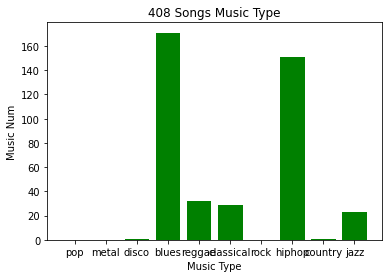

In [7]:
name_list = []
num_list = []
for key in result:
    print(key + "类型有", len(result.get(key)), "首歌")
    name_list.append(key)
    num_list.append(len(result.get(key)))
plt.bar(name_list, num_list, color='green')
plt.title("408 Songs Music Type")
plt.xlabel("Music Type")
plt.ylabel("Music Num")
plt.show()